# PROBLEM STATEMENT

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

Exercise:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

Points to Remember:

•	There are no null values in the dataset. 

•	There may be some customers with no loan history. 

•	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.

•	For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.

•	You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data. 

Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r'C:\Users\ankus\OneDrive\Desktop\Data file.csv')

In [3]:
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
#delete unwanted column "unnamed"
data=data.drop("Unnamed: 0",axis=1)
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
data.isnull().sum().sum()

0

it is clear that there is no null values

In [6]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


# target variable
     >label

<function matplotlib.pyplot.show(close=None, block=None)>

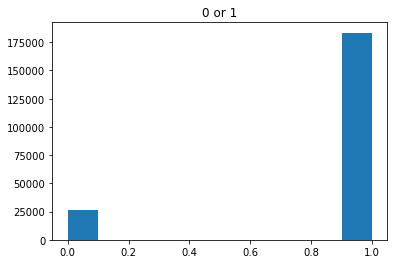

In [7]:
data["label"].hist(grid=False)
plt.title("0 or 1")
plt.show

data is looking embalanced we have to normalize the data

# label encoding

In [8]:
#last two columns need encoding as they having text 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
data = data.copy()
for column in data.columns:
    data[column] = le.fit_transform(data[column])
data.head()   

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,40191,279,80775,77458,13831,14958,31,11,14,...,1,0,2,2,1,0,850,1749,0,49
1,1,142291,719,121865,124531,87782,84434,49,11,38,...,2,0,1,2,2,0,0,0,0,70
2,1,33594,542,65526,63370,39144,35464,32,11,14,...,1,0,1,1,1,0,0,0,0,79
3,1,104157,248,14833,14764,11309,11227,70,11,10,...,1,0,2,2,1,0,0,0,0,5
4,1,6910,954,47174,47056,45072,40939,33,11,23,...,1,0,7,7,1,0,244,439,0,21


# check for correlation

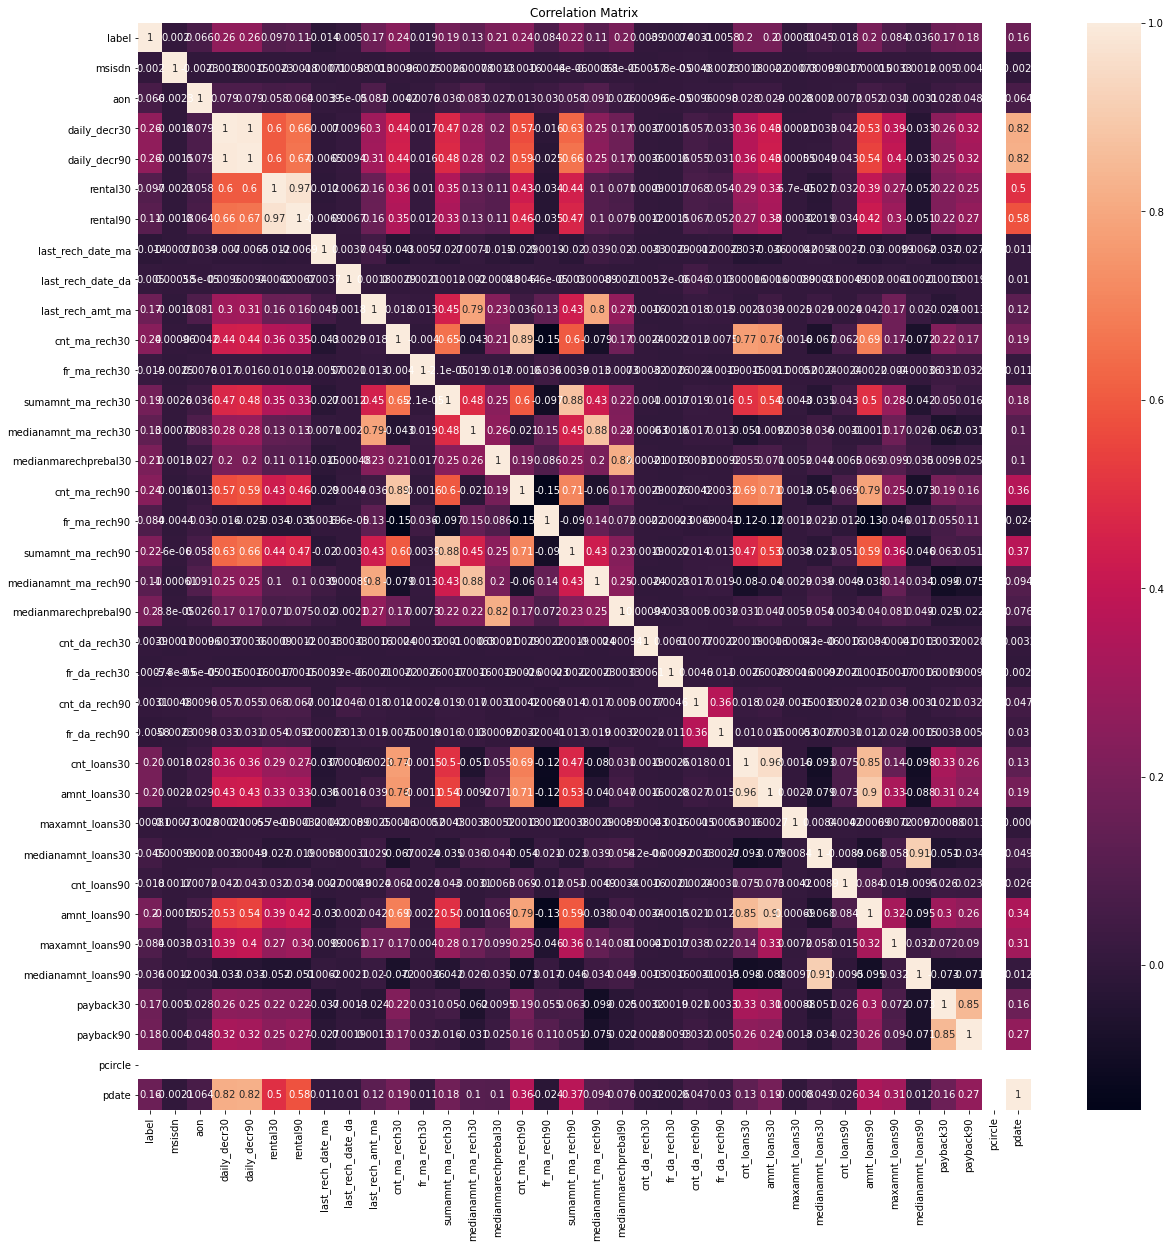

In [10]:
data.corr()
corr_mat=data.corr()

#size of the canvas
plt.figure(figsize=([20,20]))

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [11]:
corr_mat=data.corr()
corr_mat

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
label,1.000000,0.001976,0.066149,0.261715,0.262401,0.096589,0.111226,-0.014236,0.004965,0.169902,...,0.000810,0.044595,0.018315,0.199860,0.084144,0.035750,0.168042,0.175943,NaN,0.162687
msisdn,0.001976,1.000000,-0.002341,-0.001788,-0.001518,-0.002252,-0.001800,-0.000709,0.000582,-0.001328,...,-0.000731,0.000992,0.001659,-0.000151,0.003286,0.001217,0.004974,0.004029,NaN,-0.002085
aon,0.066149,-0.002341,1.000000,0.078593,0.078766,0.057727,0.063710,0.003947,0.000035,0.081073,...,-0.002758,0.002027,0.007184,0.052344,0.031109,-0.003147,0.028020,0.047754,NaN,0.063868
daily_decr30,0.261715,-0.001788,0.078593,1.000000,0.995230,0.598928,0.655943,-0.006978,0.009567,0.304006,...,0.000213,0.003262,0.042034,0.528678,0.385333,-0.032849,0.255387,0.324527,NaN,0.817257
daily_decr90,0.262401,-0.001518,0.078766,0.995230,1.000000,0.602328,0.665595,-0.006521,0.009444,0.305934,...,0.000550,0.004938,0.043390,0.544816,0.397262,-0.033417,0.247241,0.317966,NaN,0.821804
rental30,0.096589,-0.002252,0.057727,0.598928,0.602328,1.000000,0.970263,-0.011588,0.006177,0.156899,...,-0.000067,-0.027095,0.032026,0.394710,0.273316,-0.052497,0.217610,0.251812,NaN,0.499187
rental90,0.111226,-0.001800,0.063710,0.655943,0.665595,0.970263,1.000000,-0.006947,0.006682,0.157903,...,-0.000318,-0.019167,0.033884,0.420598,0.295773,-0.050900,0.216102,0.271495,NaN,0.582858
last_rech_date_ma,-0.014236,-0.000709,0.003947,-0.006978,-0.006521,-0.011588,-0.006947,1.000000,0.003732,0.044562,...,-0.000424,0.005760,-0.002690,-0.030403,-0.009939,0.006186,-0.036936,-0.027264,NaN,0.010850
last_rech_date_da,0.004965,0.000582,0.000035,0.009567,0.009444,0.006177,0.006682,0.003732,1.000000,0.001825,...,0.000894,0.000307,-0.000491,0.001977,0.006111,-0.002078,-0.001273,0.001899,NaN,0.010255
last_rech_amt_ma,0.169902,-0.001328,0.081073,0.304006,0.305934,0.156899,0.157903,0.044562,0.001825,1.000000,...,0.002524,0.029345,0.002399,0.041696,0.171669,0.019545,-0.024096,0.001304,NaN,0.119896


In [12]:
#some columns are highle correlated to each other so lets remove one of those column
data=data.drop(["amnt_loans90","payback90","medianamnt_loans90","fr_da_rech90","amnt_loans30","medianamnt_ma_rech90","cnt_da_rech30","fr_da_rech30","medianamnt_loans30","sumamnt_ma_rech90","cnt_ma_rech90","last_rech_amt_ma","rental90","daily_decr90","pcircle"],axis=1)

In [13]:
data.head()

,label,msisdn,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,medianmarechprebal30,fr_ma_rech90,medianmarechprebal90,cnt_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,pdate
0,0,40191,279,80775,13831,31,11,2,21,135,...,2472,21,2508,0,2,1,2,1,850,49
1,1,142291,719,121865,87782,49,11,1,0,682,...,10982,0,11650,0,1,2,1,2,0,70
2,1,33594,542,65526,39144,32,11,1,0,24,...,11606,0,12289,0,1,1,1,1,0,79
3,1,104157,248,14833,11309,70,11,0,0,0,...,1029,0,1602,0,2,1,2,1,0,5
4,1,6910,954,47174,45072,33,11,7,2,6758,...,6555,2,7827,0,7,1,7,1,244,21


In [14]:
data.shape

(209593, 21)

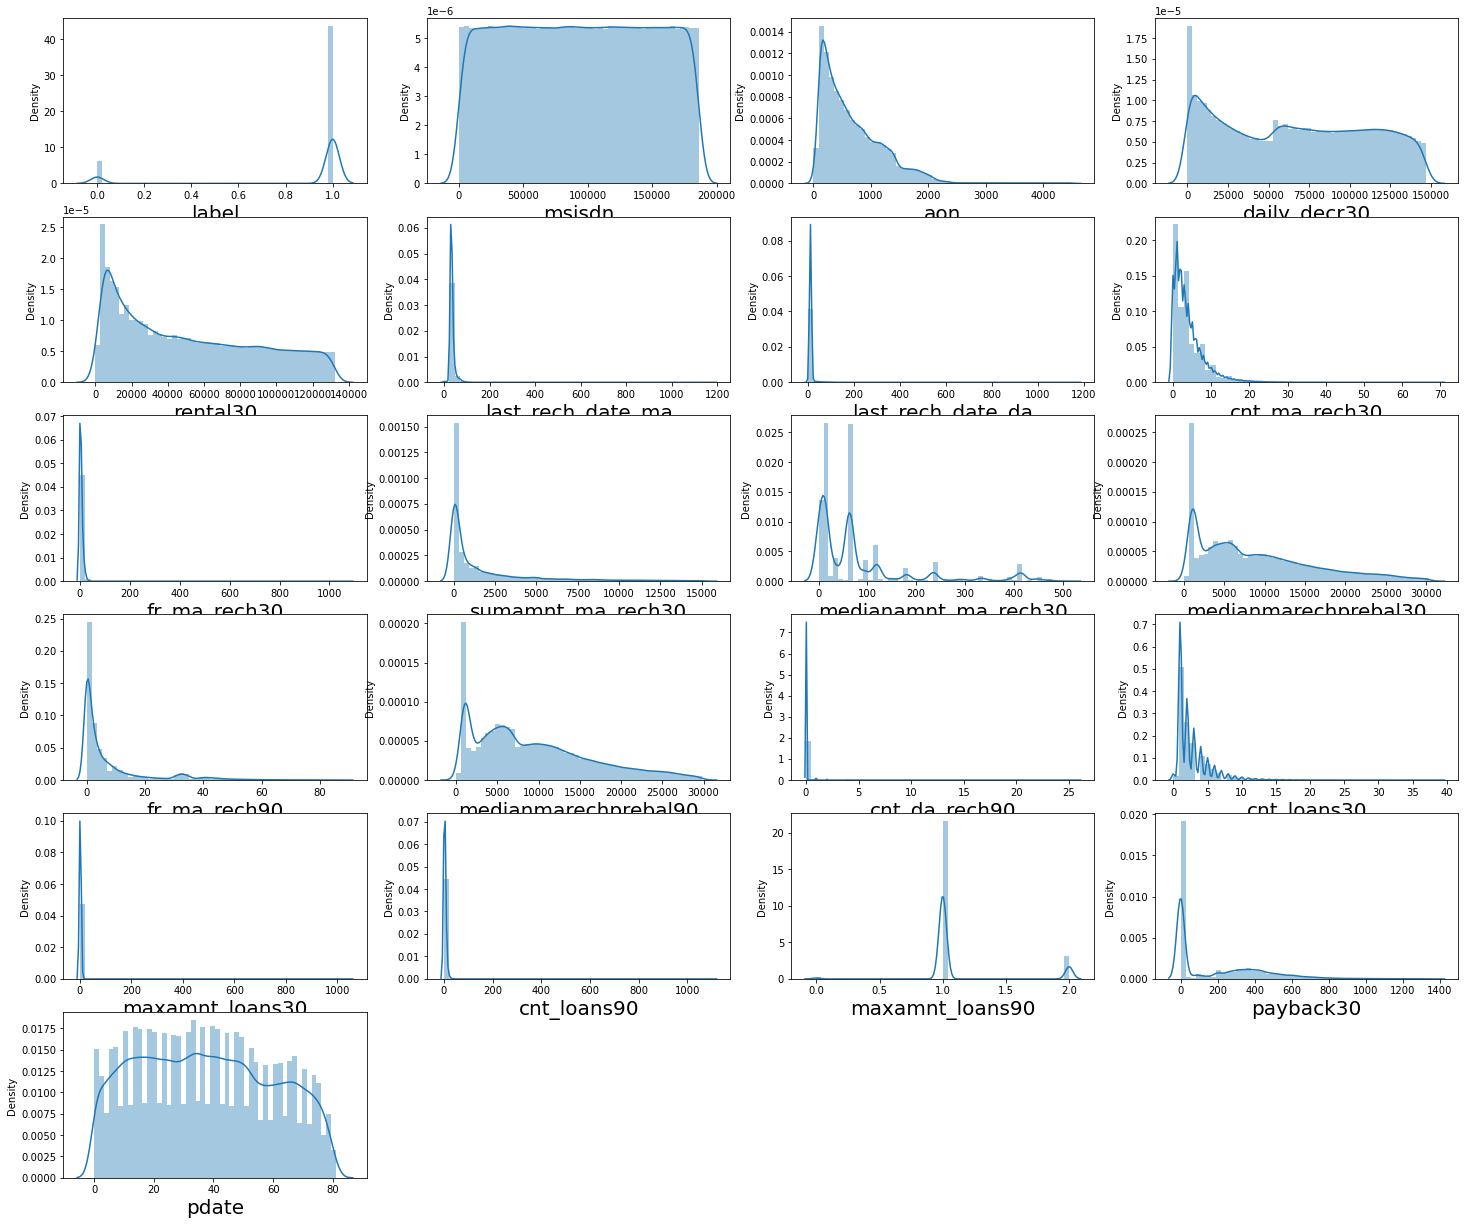

In [15]:
#let's check the data distribution among all the columns
plt.figure(figsize=(25,25))
plotnumber=1

for column in data:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

# seperate features and target variable

In [16]:
x=data.drop(["label"],axis=1)
y=data["label"]

In [17]:
x

,msisdn,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,fr_ma_rech90,medianmarechprebal90,cnt_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,pdate
0,40191,279,80775,13831,31,11,2,21,135,63,2472,21,2508,0,2,1,2,1,850,49
1,142291,719,121865,87782,49,11,1,0,682,333,10982,0,11650,0,1,2,1,2,0,70
2,33594,542,65526,39144,32,11,1,0,24,63,11606,0,12289,0,1,1,1,1,0,79
3,104157,248,14833,11309,70,11,0,0,0,0,1029,0,1602,0,2,1,2,1,0,5
4,6910,954,47174,45072,33,11,7,2,6758,119,6555,2,7827,0,7,1,7,1,244,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,42866,411,47275,44766,30,11,3,2,2356,180,14245,2,15072,0,2,1,2,1,1,16
209589,178248,1082,22868,60133,33,11,4,1,145,15,17540,2,16395,0,3,1,3,1,1,11
209590,53995,1020,121186,104943,32,11,5,8,1882,63,9706,5,9676,0,4,2,6,2,380,58
209591,111388,1739,122728,21615,31,49,5,4,3131,15,17640,4,15814,1,2,2,3,2,0,54


In [18]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

# checking skewness

In [19]:
x.skew().sort_values()

msisdn                   0.000719
daily_decr30             0.083579
pdate                    0.116409
rental30                 0.441806
medianmarechprebal90     0.777023
medianmarechprebal30     0.853740
payback30                1.188146
maxamnt_loans90          1.678304
aon                      1.806204
medianamnt_ma_rech30     2.035013
sumamnt_ma_rech30        2.269945
fr_ma_rech90             2.285423
cnt_ma_rech30            2.684106
cnt_loans30              2.685234
last_rech_date_ma       16.524637
last_rech_date_da       16.904463
cnt_loans90             17.607075
fr_ma_rech30            17.638960
maxamnt_loans30         18.285158
cnt_da_rech90           23.642903
dtype: float64

data is looking to much skeweed lets handle it with power_transform

In [20]:
#remove skewness

from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [21]:
#validating that skewness has been removed or not

x.skew().sort_values(ascending=False)

cnt_da_rech90            6.006577
fr_ma_rech30             0.147462
fr_ma_rech90             0.142952
payback30                0.120125
cnt_loans90              0.097372
cnt_loans30              0.036257
cnt_ma_rech30           -0.000221
aon                     -0.014895
medianamnt_ma_rech30    -0.069444
medianmarechprebal30    -0.110851
medianmarechprebal90    -0.112579
sumamnt_ma_rech30       -0.130283
maxamnt_loans90         -0.133914
rental30                -0.178777
pdate                   -0.217699
msisdn                  -0.291511
daily_decr30            -0.352855
last_rech_date_ma       -0.405624
maxamnt_loans30         -1.110382
last_rech_date_da      -25.420242
dtype: float64

it is much better now then before

# data scaling

In [22]:
#data scaling using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.92855164, -0.68070707,  0.43051207, ..., -0.27047705,
         1.28594442,  0.57775419],
       [ 0.90402732,  0.36130212,  1.13026074, ...,  2.25810926,
        -0.95865368,  1.36067787],
       [-1.07962307,  0.02609381,  0.13524444, ..., -0.27047705,
        -0.95865368,  1.67272967],
       ...,
       [-0.63401932,  0.80743456,  1.11955707, ...,  2.25810926,
         1.06572313,  0.92409065],
       [ 0.41109115,  1.56099594,  1.14383033, ...,  2.25810926,
        -0.95865368,  0.77241039],
       [ 0.57252135,  1.42609049,  0.61573518, ...,  2.25810926,
        -0.95865368,  0.03958262]])

finding variance inflation factor in each scaled column i.e. x_scaled1

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

vif["Features"]=x.columns

#let's check the values
vif

,vif,Features
0,1.000157,msisdn
1,1.035095,aon
2,6.594520,daily_decr30
3,1.620019,rental30
4,1.112977,last_rech_date_ma
5,1.927478,last_rech_date_da
6,8.224714,cnt_ma_rech30
7,1.976464,fr_ma_rech30
8,12.303306,sumamnt_ma_rech30
9,4.071410,medianamnt_ma_rech30


all the vif values are less than 5 and are very low. that means no multicollinearity. now, we can go ahead with fitting our data to the model. before that let's split our data in test and training set

# Training Process

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [26]:
#spliting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 180)

In [27]:
x_train

,msisdn,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,fr_ma_rech90,medianmarechprebal90,cnt_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,pdate
209034,0.925567,-0.694904,0.153976,1.087607,-0.293134,-0.153574,0.620196,0.179831,0.027705,-0.695324,1.545353,-0.060965,1.643995,-0.162110,1.194614,-0.176585,1.040044,-0.270477,1.077268,0.039583
179233,0.542354,0.155888,-0.843001,-1.751368,-0.020372,-0.153574,0.095937,0.646702,-0.329492,-0.541536,-0.552349,0.369295,-0.674040,-0.162110,0.924661,-0.176585,0.625888,-0.270477,1.080077,-0.564153
195096,0.748389,0.674862,0.783996,0.077866,-0.108413,4.702022,1.144806,0.179831,0.539474,-0.541536,1.166777,-0.060965,1.281418,6.168644,1.403189,-0.176585,1.396634,-0.270477,0.951451,0.695255
60718,1.270755,-1.023850,-0.190617,1.143199,-0.199274,-0.153574,1.716867,-1.128194,1.418872,0.324682,-0.054732,-1.207069,-0.128390,-0.162110,1.570472,-0.176585,1.182562,-0.270477,0.827833,-0.465494
83499,0.476475,1.472720,-0.759473,-0.235137,-0.390191,-0.153574,0.095937,0.646702,0.025579,0.324682,1.030047,0.369295,1.082925,-0.162110,0.556344,-0.176585,0.301267,-0.270477,0.983394,-0.769782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196485,0.435726,-1.395410,-1.146617,-0.853299,0.382842,-0.153574,-0.799483,-1.128194,-0.874114,0.324682,0.620880,0.188419,1.407744,-0.162110,-0.913022,-0.176585,-1.035144,-0.270477,-0.958654,-0.823178
83997,0.092171,1.234347,1.186100,0.358346,0.065014,-0.153574,0.095937,1.496106,0.692582,0.324682,-0.201784,-1.207069,0.258634,-0.162110,0.556344,-0.176585,1.040044,-0.270477,0.983394,1.181876
205835,-0.653023,-1.804580,-1.820962,-1.287883,-0.490663,-0.153574,-1.693882,-1.128194,-1.628181,-1.734387,-1.516673,-1.207069,-1.623101,-0.162110,-0.913022,-0.176585,-1.035144,-0.270477,-0.958654,-1.898016
68374,-0.556270,1.620488,0.502597,-0.941567,0.800764,-0.153574,-0.799483,-1.128194,-0.874114,0.324682,-0.980305,1.225481,-0.671998,-0.162110,-0.913022,-0.176585,-0.186879,-0.270477,-0.958654,0.577754


In [28]:
x_test

,msisdn,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,fr_ma_rech90,medianmarechprebal90,cnt_da_rech90,cnt_loans30,maxamnt_loans30,cnt_loans90,maxamnt_loans90,payback30,pdate
165053,-0.006845,1.171800,-1.045177,-1.234283,-0.199274,-0.153574,-0.799483,-1.128194,-1.146007,-0.541536,1.159608,-1.207069,1.229052,-0.162110,0.011766,-0.176585,-0.186879,-0.270477,1.194254,-1.290015
15420,0.167966,1.387760,-0.802433,0.899307,0.306687,-0.153574,-0.275820,0.452211,-0.342065,0.324682,1.363033,0.188419,1.451449,-0.162110,0.011766,-0.176585,-0.186879,-0.270477,1.085607,-0.769782
155795,0.958956,0.280912,-0.809770,-0.102578,0.382842,-0.153574,-0.799483,-1.128194,-0.291732,1.135101,-1.089280,-1.207069,-1.223474,-0.162110,-0.913022,-0.176585,-1.035144,-0.270477,-0.958654,-0.717231
5538,-0.223977,1.751655,1.403584,1.187520,-0.199274,-0.153574,-0.799483,-1.128194,-0.577808,0.796136,-1.365484,-1.207069,-1.483730,-0.162110,-0.913022,-0.176585,-1.035144,-0.270477,-0.958654,0.417518
144387,1.132326,1.431636,0.346123,-0.956510,0.065014,-0.153574,-0.275820,1.382742,-0.862990,-0.695324,0.084323,0.798000,-0.225506,-0.162110,0.556344,-0.176585,0.860655,-0.270477,1.213343,0.656330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12542,0.179694,-0.237753,-0.174099,-1.606975,1.861140,-0.153574,-1.693882,-1.128194,-1.628181,-1.734387,-1.516673,-1.207069,-1.181250,-0.162110,-3.041979,-5.499453,-3.061700,-5.450576,-0.958654,0.998694
120493,1.278401,0.698613,-1.154381,0.521916,-0.020372,-0.153574,0.620196,0.914665,-0.124006,-0.541536,-0.306343,0.622764,-0.413171,-0.162110,0.924661,-0.176585,0.625888,-0.270477,1.011946,-0.932752
198560,1.206223,1.281906,0.357402,1.409090,-0.020372,-0.153574,-0.799483,-1.128194,-0.577808,0.796136,-0.790019,0.509415,-0.917790,-0.162110,0.011766,-0.176585,-0.186879,-0.270477,-0.958654,0.772410
65266,-0.763035,-0.284233,-1.155073,-1.050443,-0.199274,3.063038,0.384414,0.179831,0.225116,0.357234,-0.195510,-0.060965,-0.290681,6.168644,0.011766,-0.176585,-0.186879,-0.270477,-0.958654,-1.640170


In [29]:
y_train

209034    1
179233    1
195096    1
60718     1
83499     1
         ..
196485    1
83997     1
205835    0
68374     1
171761    1
Name: label, Length: 157194, dtype: int64

In [30]:
y_test

165053    1
15420     1
155795    1
5538      1
144387    1
         ..
12542     1
120493    1
198560    1
65266     1
169719    1
Name: label, Length: 52399, dtype: int64

# logistic regression

In [31]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy 88.93108647111586
[[ 1425  5050]
 [  750 45174]]
              precision    recall  f1-score   support

           0       0.66      0.22      0.33      6475
           1       0.90      0.98      0.94     45924

    accuracy                           0.89     52399
   macro avg       0.78      0.60      0.63     52399
weighted avg       0.87      0.89      0.86     52399



# Decision tree classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
predict=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,predict)*100)
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

Accuracy 88.21160709173839
[[ 3574  2901]
 [ 3276 42648]]
              precision    recall  f1-score   support

           0       0.52      0.55      0.54      6475
           1       0.94      0.93      0.93     45924

    accuracy                           0.88     52399
   macro avg       0.73      0.74      0.73     52399
weighted avg       0.89      0.88      0.88     52399



# Random forest classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 92.23649306284472
[[ 3313  3162]
 [  906 45018]]
              precision    recall  f1-score   support

           0       0.79      0.51      0.62      6475
           1       0.93      0.98      0.96     45924

    accuracy                           0.92     52399
   macro avg       0.86      0.75      0.79     52399
weighted avg       0.92      0.92      0.92     52399



LogisticRegression,RandomForest and Decision tree classifier are predicting good accuracy. now we will check cross validation score as well for overfitting

# Cross validation

In [34]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=5)
print("Cross Validation score of Logistic Regression model:",scr.mean())

Cross Validation score of Logistic Regression model: 0.8884647877288387


In [35]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross Validation score of Random FOrest:",scr.mean())

Cross Validation score of Random FOrest: 0.9208752205821373


In [37]:
dt=cross_val_score(dt,x,y,cv=5)
print("Cross Validation score of DecisionTreeClassifier:",dt.mean())

Cross Validation score of DecisionTreeClassifier: 0.8825962744275945


Random forest is performing best among all so we will continue with Random Forest

# Hyper parameter Tunning

In [38]:
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in GridSearchCv
parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8],
            'criterion':['gini','entropy']}

In [39]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)    #fitting the data in the model
GCV.best_params_          #print the best parameter found by GridSearchCV

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto'}

In [40]:
 GCV_pred=GCV.best_estimator_.predict(x_test)     #prediccting with best parameters
accuracy_score(y_test,GCV_pred)

0.9083570297143075

# ROC AUC Plot

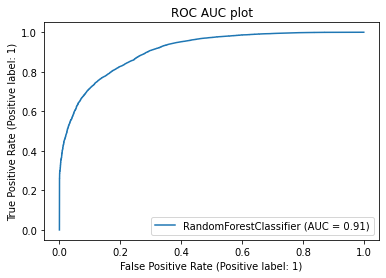

In [42]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# save model

In [43]:
import joblib
joblib.dump(GCV.best_estimator_,"Microcreditdefaulter.pkl")

['Microcreditdefaulter.pkl']